<a href="https://colab.research.google.com/github/allarva/itmo_course/blob/main/my_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade matplotlib > None # need refresh enviroment after installation

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.cbook import boxplot_stats

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

%matplotlib inline

# Data intro

Набор данных состоит из 1000 записей, содержащих пол, расу, уровень образования родителей, ланч, наличие курса подготовки, оценку математики, чтения и письма

In [3]:
data = pd.read_csv('exams.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [4]:
data.shape

(1000, 8)

In [5]:
data.columns #заголовки колонок - наименования признаков

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
col_string = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course']
for col in data[col_string]: 
    print(f'Column = {col}\nElements = {data[col].unique()}\n') 
#возможные значения каждого из признаков

Column = gender
Elements = ['male' 'female']

Column = race/ethnicity
Elements = ['group A' 'group D' 'group E' 'group B' 'group C']

Column = parental level of education
Elements = ['high school' 'some high school' 'some college' "associate's degree"
 "bachelor's degree" "master's degree"]

Column = lunch
Elements = ['standard' 'free/reduced']

Column = test preparation course
Elements = ['completed' 'none']



In [7]:
data.dtypes #типы данных

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [8]:
data.isna().sum() #количество пустых ячеек по колонкам

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
df = data.copy().dropna() # удаляет данные с пустыми ячейками, здесь эта строка не нужна

# Numerical columns

In [10]:
num_cols = df.select_dtypes(exclude='object') #выбор колонки с числовыми данными
num_cols.shape

(1000, 3)

In [11]:
num_cols.describe() #статистика по числовым данным

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


# Categorical columns

In [12]:
cat_cols = df.select_dtypes(include='object') #выбор категориальных признаков
cat_cols.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,male,group A,high school,standard,completed
1,female,group D,some high school,free/reduced,none
2,male,group E,some college,free/reduced,none
3,male,group B,high school,standard,none
4,male,group E,associate's degree,standard,completed


In [13]:
cat_cols.shape

(1000, 5)

In [14]:
cat_cols.describe() #статистика по категориальным признакам

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,male,group C,some college,standard,none
freq,517,323,222,652,665


# Label encoding

Замену делаю вручную, поскольку для некоторых категорий определенным значениям полезно присвоить определенное числовое значение, чтобы показать взаимосвязь. Например, для "parental level of education" значения целесообразно упорядочить от низкого уровня к высокому (0--4)

In [15]:
cleanup_nums = {"gender":     {"male": 0, "female": 1},
                "race/ethnicity": {"group A": 0, "group B": 1, "group C": 2, "group D": 3,
                                  "group E": 4},
                "parental level of education": {"some high school": 0, "high school": 1, "some college": 2, "associate's degree": 3,
                                  "bachelor's degree": 4 , "master's degree": 5},
                "lunch":     {"standard": 0, "free/reduced": 1},
                "test preparation course":     {"none": 0, "completed": 1}}
df = df.replace(cleanup_nums)
df.head()  

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,0,1,0,1,67,67,63
1,1,3,0,1,0,40,59,55
2,0,4,2,1,0,59,60,50
3,0,1,1,0,0,77,78,68
4,0,4,3,0,1,78,73,68


# Scatterplots with targets

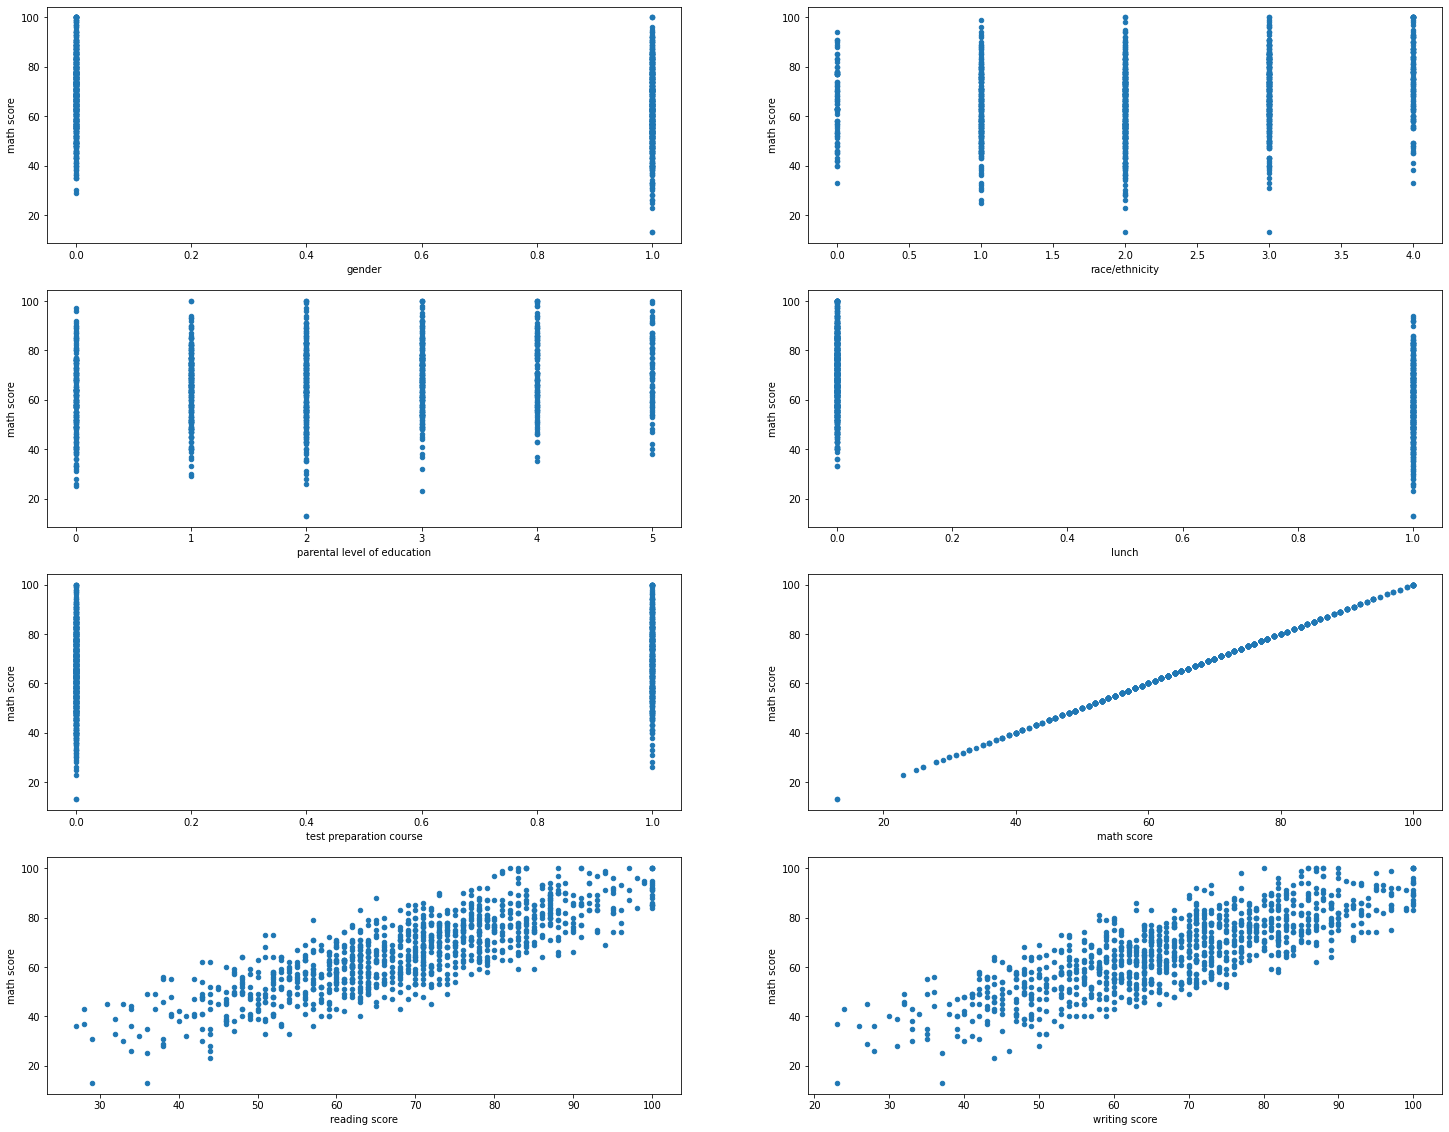

In [16]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 20))
for idx, feature in enumerate(df.columns):
    df.plot(feature, "math score", subplots=True, kind="scatter", ax=axes[idx // 2, idx % 2])

## Вывод 1

Можно заметить, что:
*   00 - результаты math score незначительно выше у male(0), чем у female (1);
*   01 - видна незначимая зависимость math score от race/ethnicity;
*   10 - при возрастании parental level of education незначительно увеличивается успешность math score;
*   11 - есть некоторая зависимость math score от вида lunch;
*   20 - результаты math score незначительно выше у тех, кто прошёл test preparation course;
*   21 - линейная регрессия (math score-math score);
*   30, 31 - явно прослеживается линейная регрессия между math score и reading score, math score и writing score 







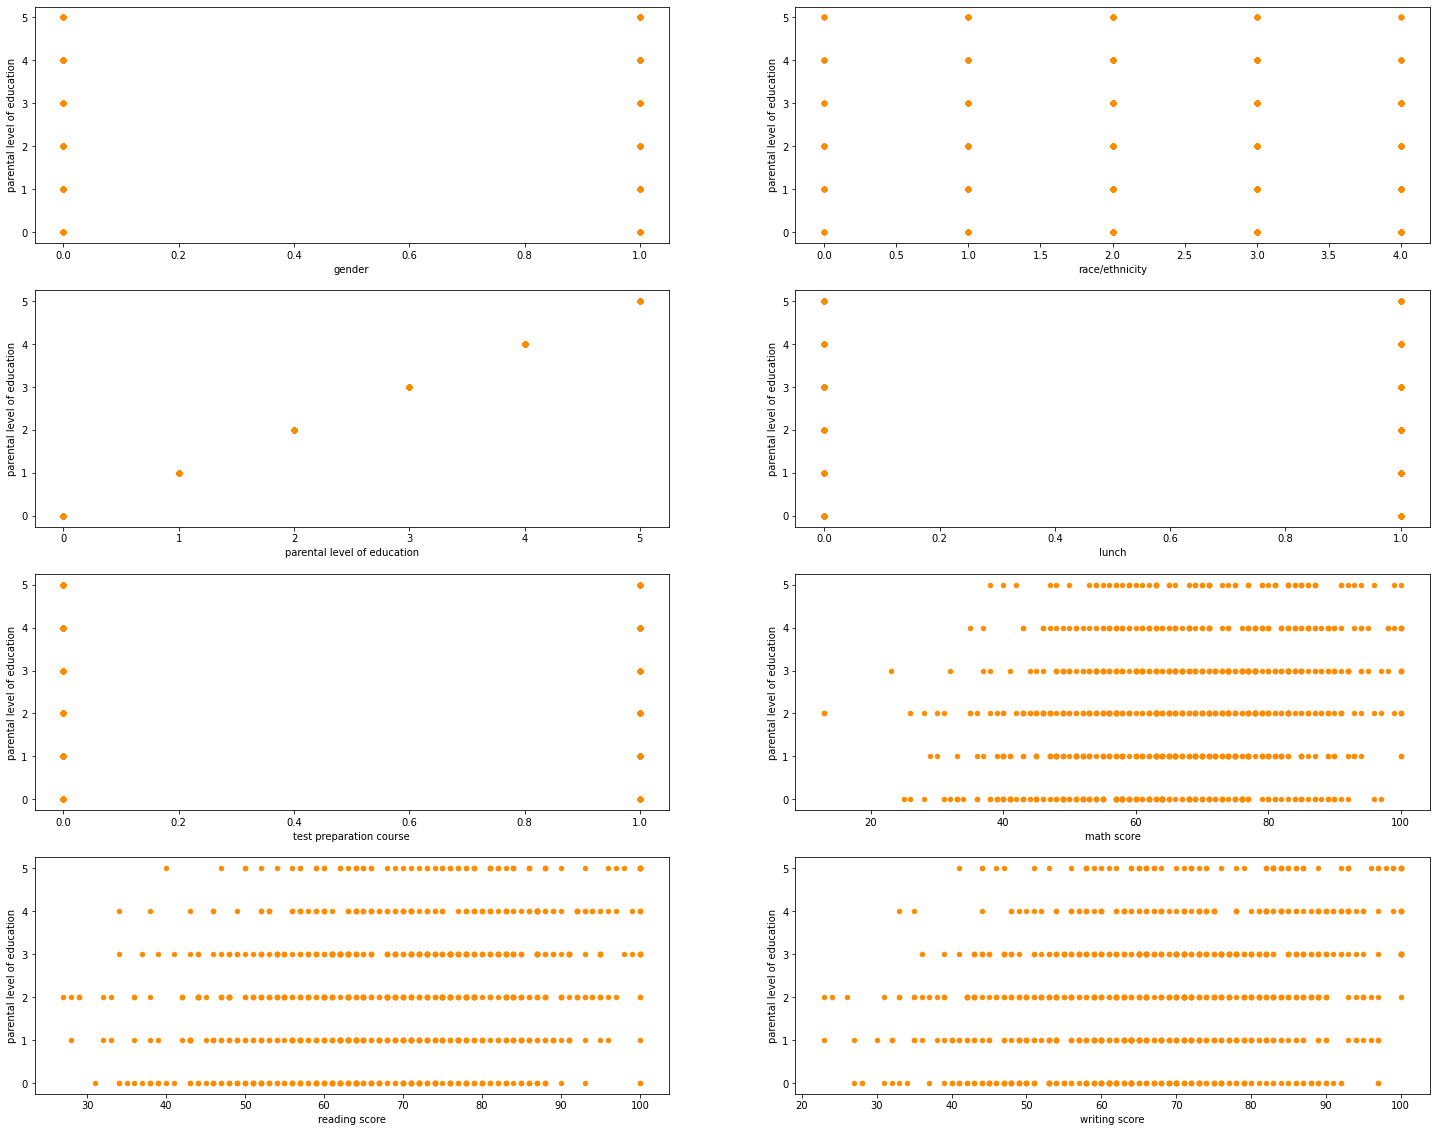

In [17]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 20))
for idx, feature in enumerate(df.columns):
    df.plot(feature, "parental level of education", subplots=True, kind="scatter", ax=axes[idx // 2, idx % 2], color='darkorange')

## Вывод 2

Можно заметить некоторую зависимость math score, reading score и writing score от parental level of education 

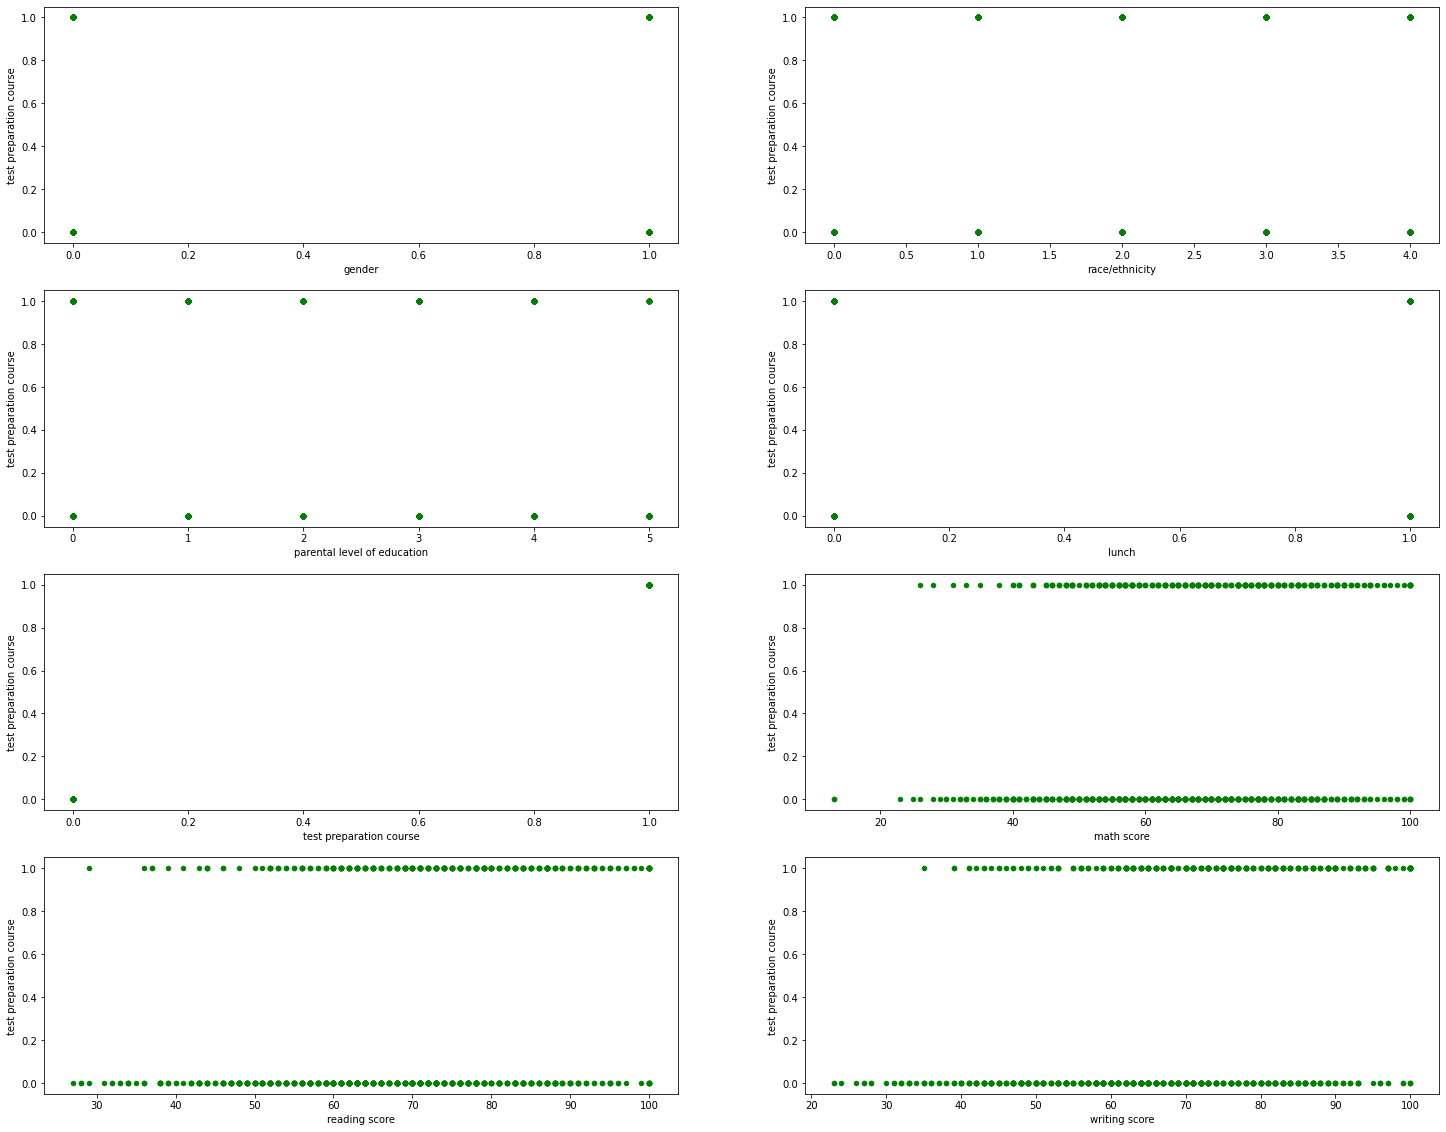

In [18]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 20))
for idx, feature in enumerate(df.columns):
    df.plot(feature, "test preparation course", subplots=True, kind="scatter", ax=axes[idx // 2, idx % 2], color='green')

## Вывод 3

Можно заметить некоторую зависимость math score, reading score и writing score от test preparation course

# Outliers

In [19]:
num_cols.columns[0:]

Index(['math score', 'reading score', 'writing score'], dtype='object')

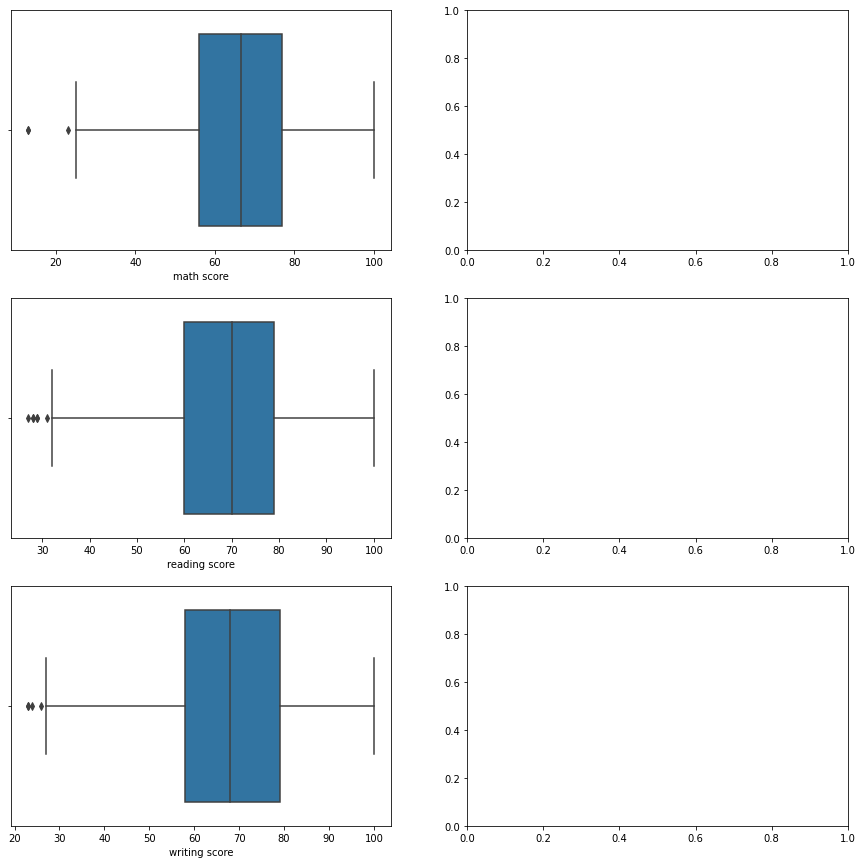

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
count = 0
for idx, feature in enumerate(num_cols.columns[0:]):
    sns.boxplot(x=df[feature], ax=axes[count % 3, count // 3])
    count += 1

In [21]:
for col in num_cols.columns[0:]:    #выбросы
    print(f'Outliers for {col} column: {boxplot_stats(df[col]).pop(0)["fliers"]}\n')

Outliers for math score column: [23 13 13]

Outliers for reading score column: [28 29 27 28 31 29]

Outliers for writing score column: [24 23 26 23]



## Вывод 4

Количество выбросов по math score, reading score и writing score незначительно

# Subplots

<AxesSubplot: xlabel='writing score', ylabel='Density'>

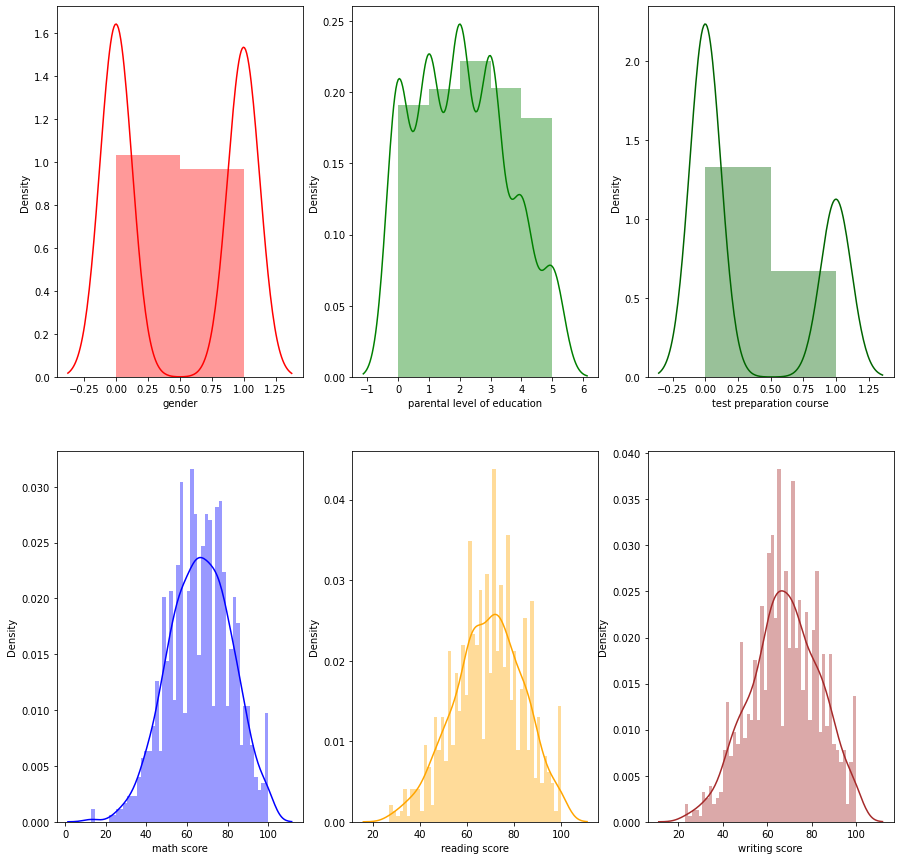

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(15, 15))
sns.distplot(df['gender'], bins=2, color='r', ax=axes[0, 0])
sns.distplot(df['parental level of education'], bins=5, color='g', ax=axes[0, 1])
sns.distplot(df['test preparation course'], bins=2, color='darkgreen', ax=axes[0, 2])
sns.distplot(df['math score'], bins=50, color='b', ax=axes[1, 0])
sns.distplot(df['reading score'], bins=50, color='orange', ax=axes[1, 1])
sns.distplot(df['writing score'], bins=50, color='brown', ax=axes[1, 2])

## Вывод 5

Распределение math score, reading score и math score близко к нормальному 

# Correlation matrix

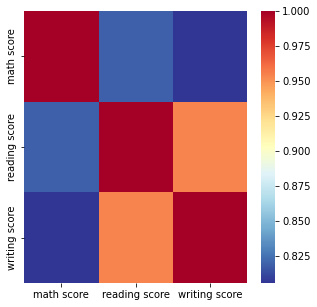

In [23]:
plt.figure(figsize=(5,5))
sns.heatmap(num_cols.corr(), cmap="RdYlBu_r"); #корреляция для числовых данных

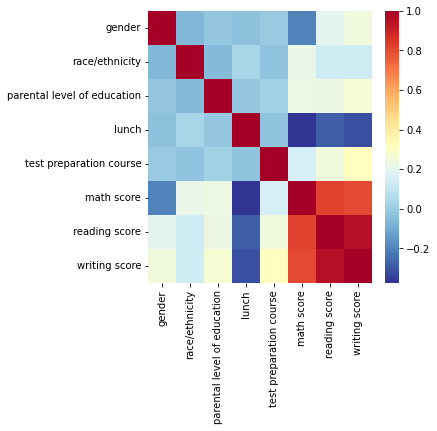

In [24]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), cmap="RdYlBu_r"); #корреляция для всех данных

## Вывод 6

Положительная корреляция между math score и reading score, math score и writing score, наиболее значимая между reading score и writing score. В других случая корреляция незначительна. Отрицательная корреляция между видом lunch и score не отражает обратной зависимости, поскольку шкала lunch номинальная, объясняется перекодированием видов lunch, но показывает, что некоторая зависимость есть. 

Дальнейшее исследование будет направлено на построение модели линейной регрессии с целевым признаком math score, т.е. на исследование влияния показателей на уровень оценки по математике.